In [197]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [198]:
df=pd.read_csv("emdat_data.csv")

In [199]:
print(df.columns)

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')


In [200]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [201]:
df.drop(columns=['Disaster Group','Disaster Subgroup'],inplace=True)

In [202]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Type',
       'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       'AID Contribution ('000 US$)', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [203]:
cols_to_drop=['DisNo.','Classification Key','Historic','External IDs','Event Name', 'ISO', 'OFDA/BHA Response', 'Appeal','CPI']
df.drop(columns=cols_to_drop,inplace=True)

In [204]:
df = df[df['Disaster Type'].isin(['Wildfire', 'Flood', 'Earthquake']) | df['Disaster Type'].isna()]

In [205]:
df.drop(columns=['Disaster Subtype'],inplace=True)

In [206]:
df.isna().sum()

Disaster Type                                   0
Country                                         0
Subregion                                       0
Region                                          0
Location                                       20
Origin                                        817
Associated Types                             1471
Declaration                                     0
AID Contribution ('000 US$)                  2053
Magnitude                                    1102
Magnitude Scale                                 0
Latitude                                     1347
Longitude                                    1347
River Basin                                  1831
Start Year                                      0
Start Month                                     0
Start Day                                      81
End Year                                        0
End Month                                       0
End Day                                        79


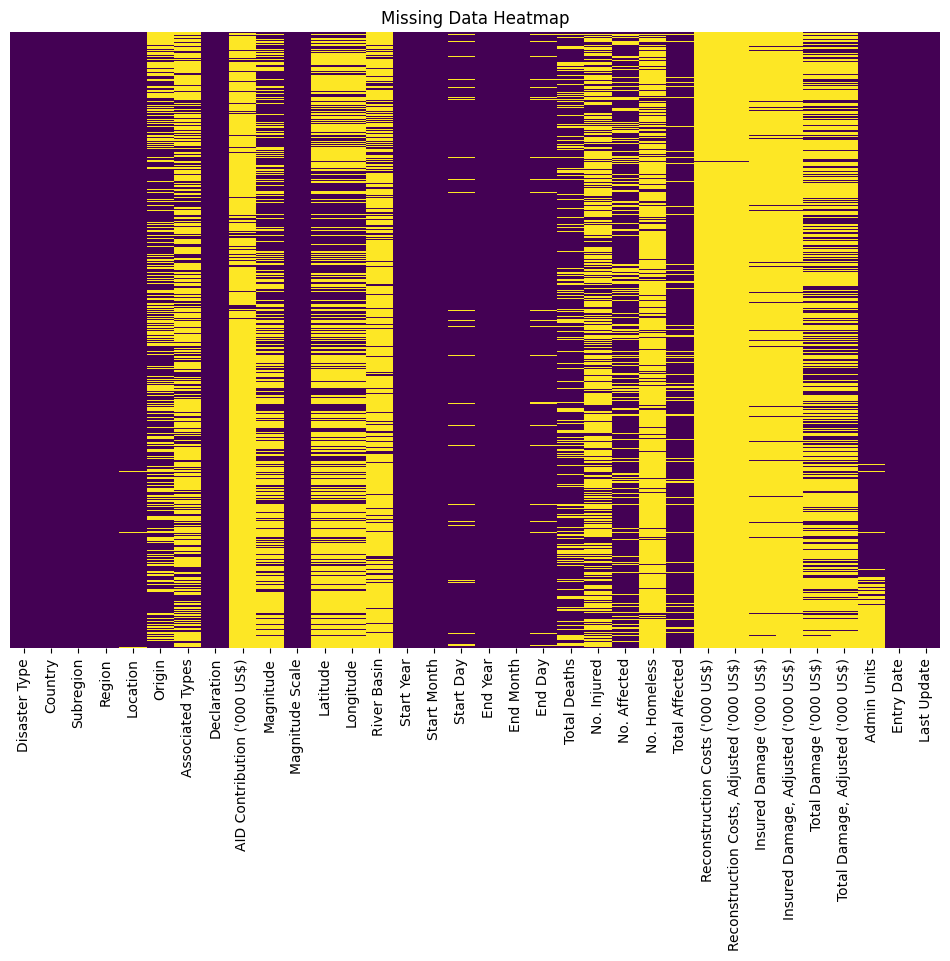

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


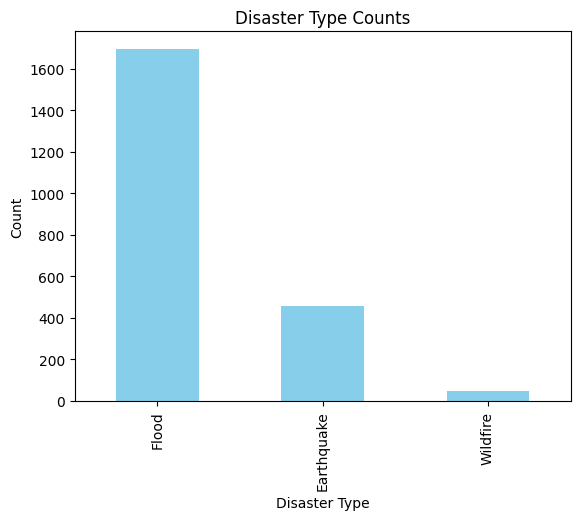

In [229]:
df['Disaster Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Disaster Type Counts')
plt.ylabel('Count')
plt.xlabel('Disaster Type')
plt.show()


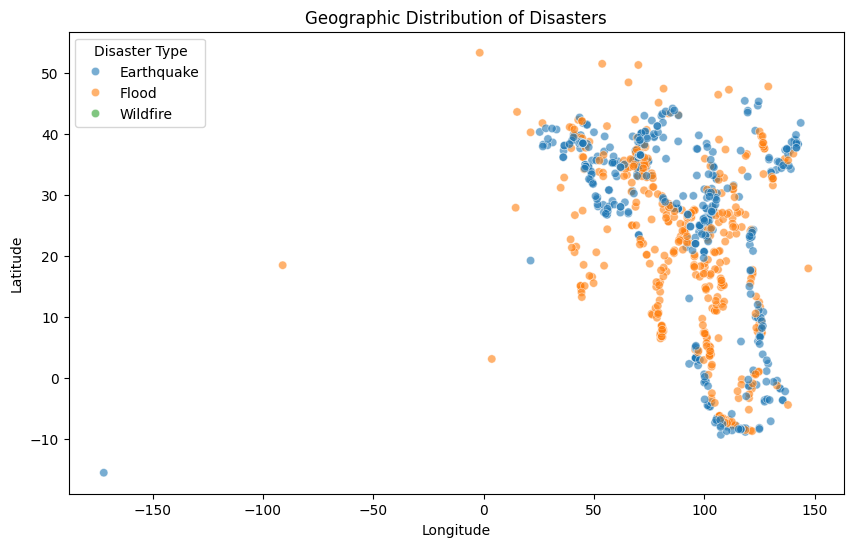

In [230]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Disaster Type', alpha=0.6)
plt.title('Geographic Distribution of Disasters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


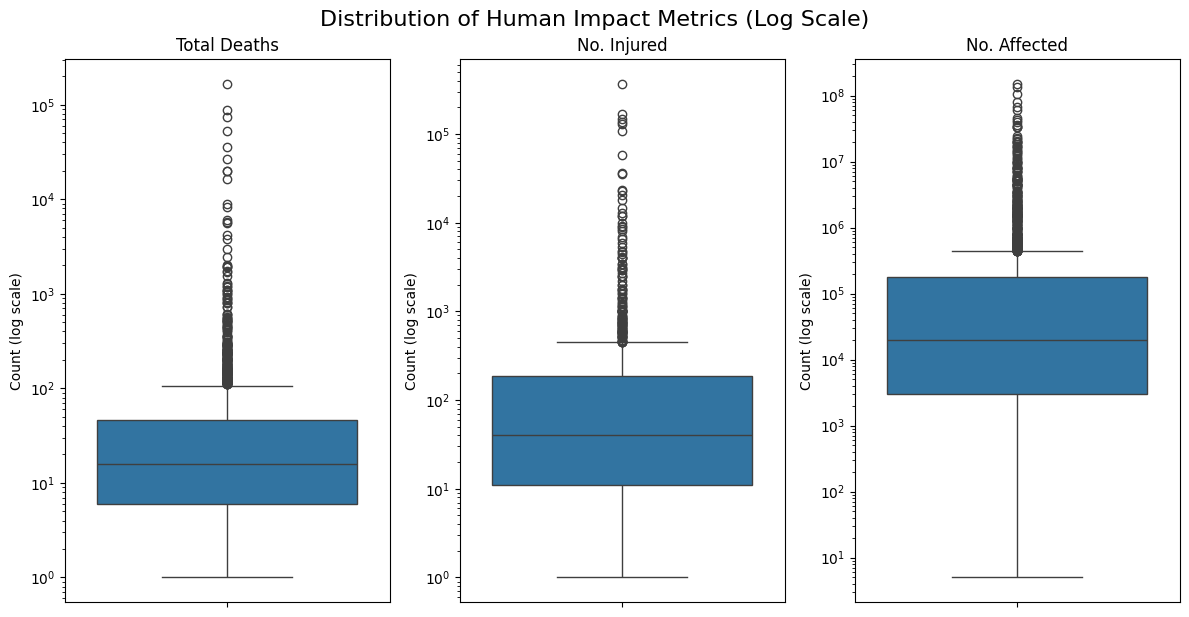

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

impact_cols = ['Total Deaths', 'No. Injured', 'No. Affected']

plt.figure(figsize=(12, 6))
for i, col in enumerate(impact_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col)
    plt.yscale('log')  # Use log scale due to high variance in values
    plt.title(col)
    plt.ylabel('Count (log scale)')
    plt.tight_layout()
plt.suptitle('Distribution of Human Impact Metrics (Log Scale)', y=1.02, fontsize=16)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


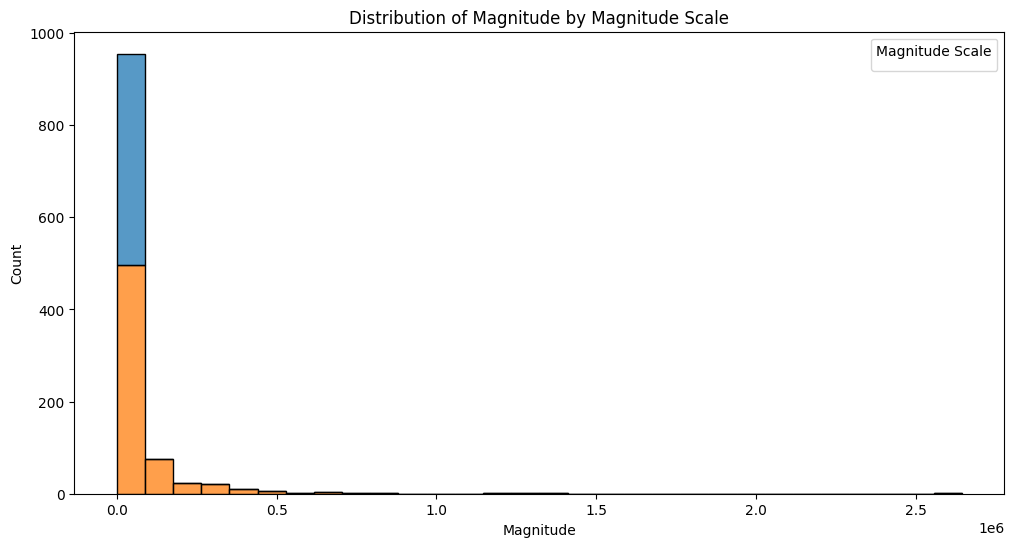

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to rows where Magnitude and Magnitude Scale are not missing
df_mag = df.dropna(subset=['Magnitude', 'Magnitude Scale'])

plt.figure(figsize=(12, 6))
sns.histplot(data=df_mag, x='Magnitude', hue='Magnitude Scale', multiple='stack', bins=30)
plt.title('Distribution of Magnitude by Magnitude Scale')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.legend(title='Magnitude Scale')
plt.show()


C:\Users\adity\anaconda3\envs\tf2_gpu\lib\site-packages\xgboost\core.py:158: UserWarning: [19:47:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

  Earthquake       1.00      1.00      1.00       138
       Flood       0.98      0.99      0.98       509
    Wildfire       0.33      0.21      0.26        14

    accuracy                           0.97       661
   macro avg       0.77      0.73      0.75       661
weighted avg       0.97      0.97      0.97       661



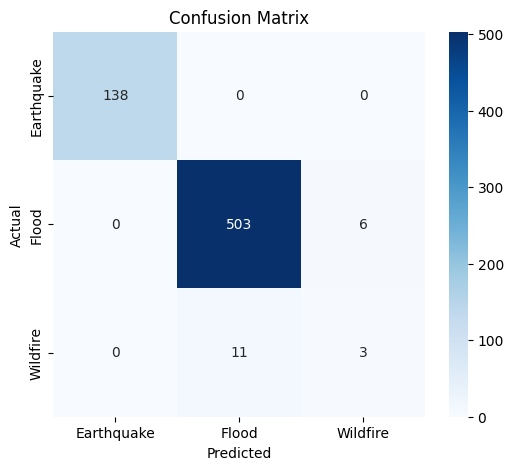

In [207]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter dataset to only required disaster types
df_filtered = df[df['Disaster Type'].isin(['Wildfire', 'Flood', 'Earthquake'])]

# 2. Define features X and target y
X = df_filtered.drop(columns=['Disaster Type'])
y = df_filtered['Disaster Type']

# 3. Properly fit LabelEncoder only on disaster types
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Impute missing numeric values
num_cols = X.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
X[num_cols] = imputer.fit_transform(X[num_cols])

# 5. Encode categorical feature columns without overwriting target LabelEncoder
cat_cols = X.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    le_cat = LabelEncoder()
    X[col] = le_cat.fit_transform(X[col].astype(str))

# 6. Train-test split with encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# 7. Apply SMOTE to balance training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 8. Initialize and train XGBoost with best hyperparameters
xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train_balanced, y_train_balanced)

# 9. Predict on test set
y_pred = xgb_clf.predict(X_test)

# 10. Classification report with correct class names
unique_classes = np.unique(y_test)
target_names = le.classes_[unique_classes]
print(classification_report(y_test, y_pred, target_names=target_names))

# 11. Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=unique_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


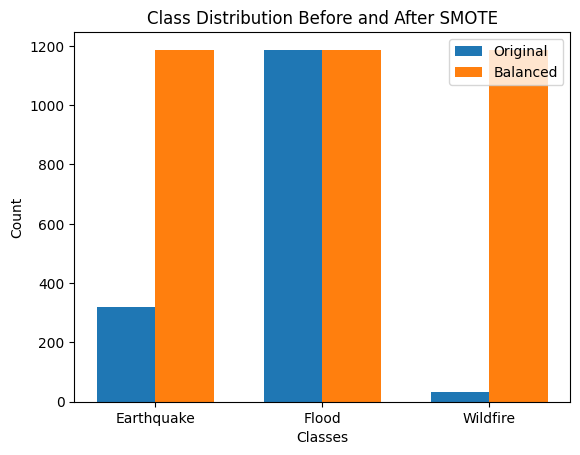

In [219]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Original class counts
orig_counts = pd.Series(y_train).value_counts().sort_index()

# Balanced class counts
balanced_counts = pd.Series(y_train_balanced).value_counts().sort_index()

labels = le.classes_

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, orig_counts, width, label='Original')
ax.bar(x + width/2, balanced_counts, width, label='Balanced')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Class Distribution Before and After SMOTE')
ax.legend()
plt.show()


In [209]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Initialize XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [5, 7,9],
    'learning_rate': [0.01,0.05,0.1,]
}

# Setup GridSearch
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # use all available cores
)

# Fit GridSearch on balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters found
print(grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\adity\anaconda3\envs\tf2_gpu\lib\site-packages\xgboost\core.py:158: UserWarning: [19:47:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [210]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize classifier with your specific hyperparameters
xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Train model on balanced data
xgb_clf.fit(X_train_balanced, y_train_balanced)

# Evaluate on test data (original, unbalanced)
y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))


C:\Users\adity\anaconda3\envs\tf2_gpu\lib\site-packages\xgboost\core.py:158: UserWarning: [19:47:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       0.98      0.99      0.98       509
           2       0.33      0.21      0.26        14

    accuracy                           0.97       661
   macro avg       0.77      0.73      0.75       661
weighted avg       0.97      0.97      0.97       661



C:\Users\adity\anaconda3\envs\tf2_gpu\lib\site-packages\xgboost\core.py:158: UserWarning: [20:00:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


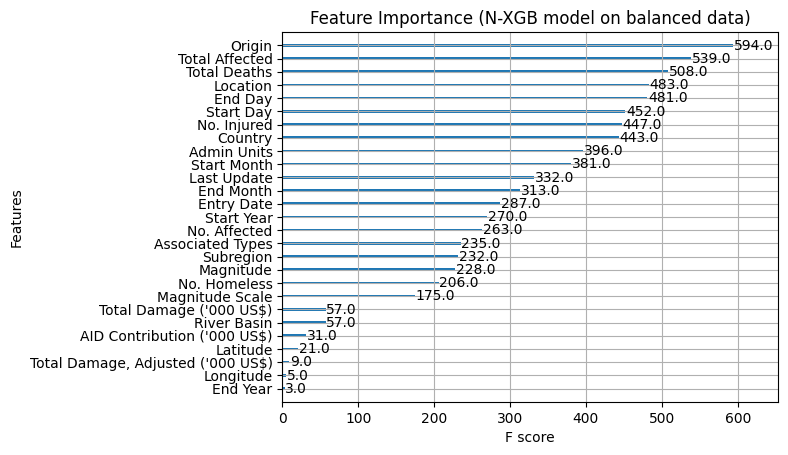

In [220]:
xgb_clf.fit(X_train_balanced, y_train_balanced)
xgb.plot_importance(xgb_clf)
plt.title("Feature Importance (N-XGB model on balanced data)")
plt.show()


In [211]:
from sklearn.preprocessing import LabelEncoder

# Filter the data for desired disaster types first (as you did)
df_filtered = df[df['Disaster Type'].isin(['Wildfire', 'Flood', 'Earthquake'])]

# Fit the LabelEncoder on filtered disaster types only
le = LabelEncoder()
y_encoded = le.fit_transform(df_filtered['Disaster Type'])


In [212]:
from sklearn.preprocessing import LabelEncoder

# Filter the data for desired disaster types first (as you did)
df_filtered = df[df['Disaster Type'].isin(['Wildfire', 'Flood', 'Earthquake'])]

# Fit the LabelEncoder on filtered disaster types only
le = LabelEncoder()
y_encoded = le.fit_transform(df_filtered['Disaster Type'])


In [213]:
print(le.classes_)


['Earthquake' 'Flood' 'Wildfire']


In [215]:
import torch
import torch.nn as nn

# Suppose X_train_balanced and X_test are pandas DataFrames or numpy arrays
# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_balanced.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Define a simple neural network feature extractor
class FeatureExtractor(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, feature_dim=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, feature_dim)
        )
        
    def forward(self, x):
        return self.net(x)

input_dim = X_train_balanced.shape[1]
model = FeatureExtractor(input_dim)
model.eval()

# Extract features (no gradient) for train and test sets
with torch.no_grad():
    X_train_nn_features = model(X_train_tensor).numpy()
    X_test_nn_features = model(X_test_tensor).numpy()


C:\Users\adity\anaconda3\envs\tf2_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adity\anaconda3\envs\tf2_gpu\lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


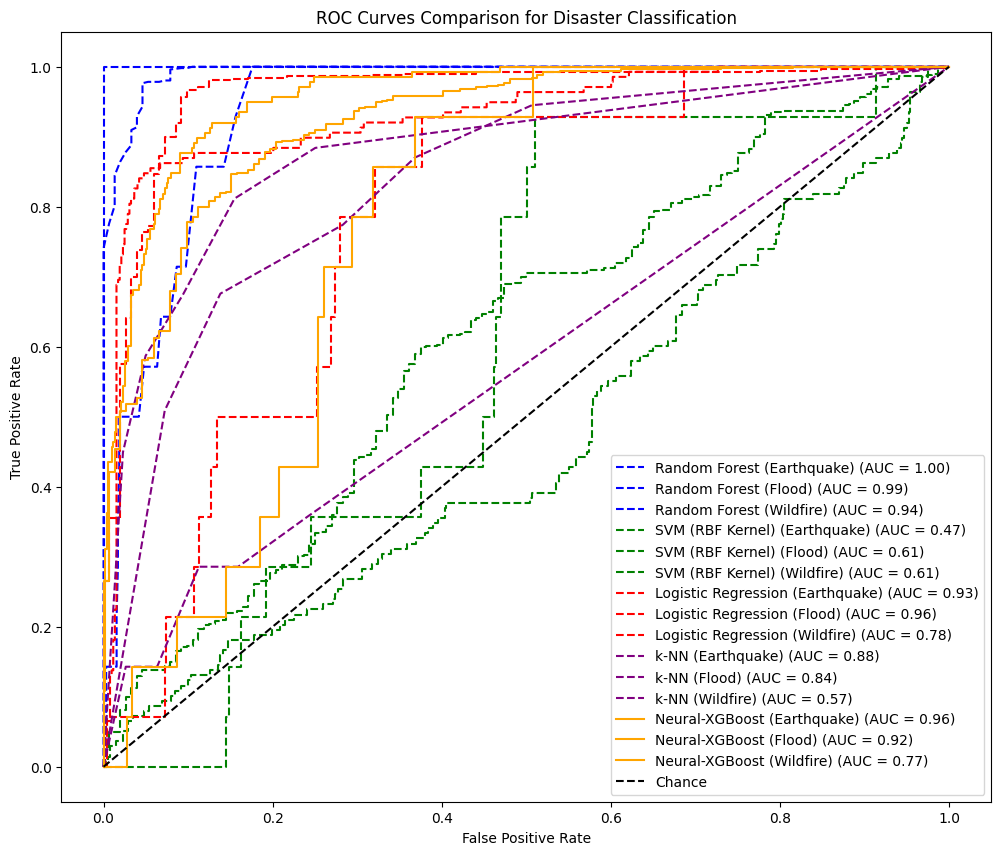

In [216]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Assuming these variables are ready:
# - X_train_balanced, y_train_balanced: balanced train features and labels (integer encoded)
# - X_test, y_test: original test features and labels (integer encoded)
# - le: LabelEncoder fitted on disaster types

# For Neural-XGBoost, assume you have neural network features:
# X_train_nn_features, X_test_nn_features (numpy arrays or pandas DataFrames)

n_classes = len(le.classes_)

# Binarize labels for multi-class ROC computation
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Define baseline models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM (RBF Kernel)': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

# Train baseline models on balanced data
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)

# Train Neural-XGBoost on neural network features
n_xgb = xgb.XGBClassifier(
    learning_rate=0.1, max_depth=7, n_estimators=300,
    use_label_encoder=False, eval_metric='mlogloss', random_state=42
)
n_xgb.fit(X_train_nn_features, y_train_balanced)
models['Neural-XGBoost'] = n_xgb

# Plot ROC curves
plt.figure(figsize=(12, 10))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for color, (name, model) in zip(colors, models.items()):
    if name == 'Neural-XGBoost':
        y_score = model.predict_proba(X_test_nn_features)
    else:
        y_score = model.predict_proba(X_test)
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, linestyle='-' if name == 'Neural-XGBoost' else '--',
                 label=f'{name} ({le.classes_[i]}) (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison for Disaster Classification')
plt.legend(loc='lower right')
plt.show()


Epoch 1/20, Loss: 461045.1258
Epoch 2/20, Loss: 181632.8110
Epoch 3/20, Loss: 102429.9485
Epoch 4/20, Loss: 46918.1707
Epoch 5/20, Loss: 15974.4983
Epoch 6/20, Loss: 9149.6178
Epoch 7/20, Loss: 6291.9939
Epoch 8/20, Loss: 5312.2149
Epoch 9/20, Loss: 6462.0382
Epoch 10/20, Loss: 6129.1258
Epoch 11/20, Loss: 3115.8989
Epoch 12/20, Loss: 5990.1416
Epoch 13/20, Loss: 3633.2769
Epoch 14/20, Loss: 2572.4787
Epoch 15/20, Loss: 3017.8982
Epoch 16/20, Loss: 3131.6804
Epoch 17/20, Loss: 4718.1002
Epoch 18/20, Loss: 3535.8794
Epoch 19/20, Loss: 3025.8577
Epoch 20/20, Loss: 4146.3706


C:\Users\adity\anaconda3\envs\tf2_gpu\lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


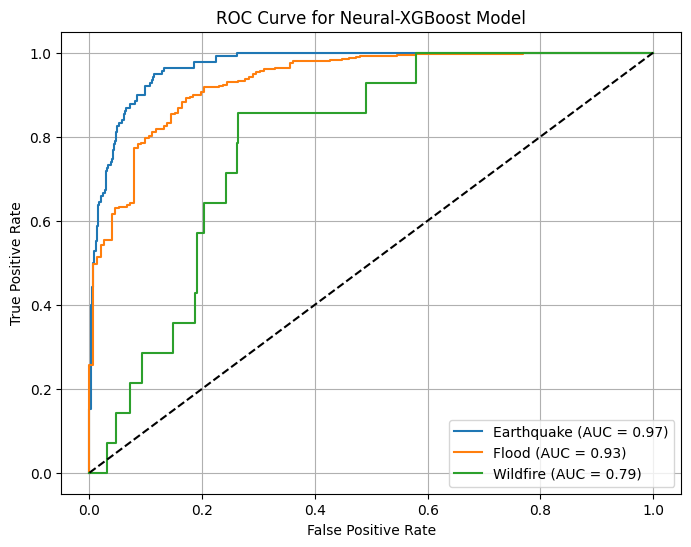

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import torch
import torch.nn as nn

# Assume you have these ready from previous steps:
# X_train_balanced (balanced train features, pandas DataFrame or numpy array)
# y_train_balanced (balanced train labels, integer encoded)
# X_test (test features)
# y_test (test labels, integer encoded)
# le (LabelEncoder fitted on disaster types)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_balanced.values if hasattr(X_train_balanced, 'values') else X_train_balanced, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values if hasattr(X_test, 'values') else X_test, dtype=torch.float32)

# Define a simple neural network feature extractor
class FeatureExtractor(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, feature_dim=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, feature_dim)
        )
        
    def forward(self, x):
        return self.net(x)

input_dim = X_train_tensor.shape[1]
model = FeatureExtractor(input_dim)

# Train neural network (simple training loop)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 20
batch_size = 64

from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model.train()
for epoch in range(epochs):
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

# Extract features from train and test sets
model.eval()
with torch.no_grad():
    X_train_nn_features = model(X_train_tensor).numpy()
    X_test_nn_features = model(X_test_tensor).numpy()

# Train XGBoost on extracted features
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1, max_depth=7, n_estimators=300,
    use_label_encoder=False, eval_metric='mlogloss', random_state=42
)
xgb_clf.fit(X_train_nn_features, y_train_balanced)

# Predict probabilities on test features
y_score = xgb_clf.predict_proba(X_test_nn_features)

# Binarize test labels for multi-class ROC
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural-XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


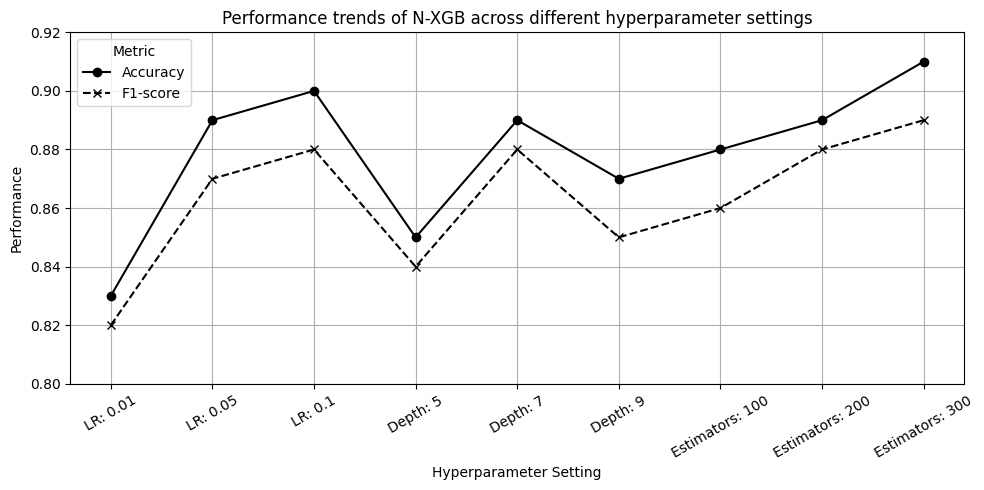

In [218]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Settings for EACH experiment (one per hyperparameter setting—fill your actual values)
param_labels = [
    'LR: 0.01', 'LR: 0.05', 'LR: 0.1',
    'Depth: 5', 'Depth: 7', 'Depth: 9',
    'Estimators: 100', 'Estimators: 200', 'Estimators: 300'
]
accuracies = [0.83, 0.89, 0.90, 0.85, 0.89, 0.87, 0.88, 0.89, 0.91]  # Example
f1_scores = [0.82, 0.87, 0.88, 0.84, 0.88, 0.85, 0.86, 0.88, 0.89]  # Example

x = np.arange(len(param_labels))

plt.figure(figsize=(10,5))
plt.plot(x, accuracies, 'k-', marker='o', label='Accuracy')
plt.plot(x, f1_scores, 'k--', marker='x', label='F1-score')
plt.xticks(x, param_labels, rotation=30)
plt.xlabel('Hyperparameter Setting')
plt.ylabel('Performance')
plt.title('Performance trends of N-XGB across different hyperparameter settings')
plt.legend(title='Metric')
plt.ylim([0.8, 0.92])
plt.grid(True)
plt.tight_layout()
plt.show()
